In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import config
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import json

In [6]:
# URL for the FRED API
base_url = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
general_dict = {
    'ATNHPIUS26420Q': 'Houston House Price Index',
    "CUURA318SA0": "Houston Consumer Price Index",
    "WPUSI012011":"Construction Materials Index",
    "DCOILWTICO": "WTI Oil Price",
    "HOUS448UR":"Unemployment Rate",
    "MORTGAGE30US":"Interest Rate",
}
'''_________________________________________________________________________________'''
#income key values data 
income_dict = {
    'MHITX48201A052NCEN' : "Harris Cty Income",
    "MHITX48157A052NCEN" : "Fort Bend Cty Income",
    "MHITX48339A052NCEN": "Montgomery Cty Income", 
    "MHITX48039A052NCEN" : "Brazoria Cty Income", 
    "MHITX48167A052NCEN": "Galveston Cty Income",
    "MHITX48291A052NCEN" : "Liberty Cty Income",
    "MHITX48473A052NCEN": "Waller Cty Income",
    "MHITX48071A052NCEN" : "Chambers Cty Income",
    "MHITX48015A052NCEN": "Austin Cty Income"
}

'''_________________________________________________________________________________'''
#key values for population 
population_dict = {
    'TXHARR1POP':'Harris Cty Population',
    'TXFORT5POP':'Fort Bend Cty Population',
    'TXMONT0POP':'Montgomery Cty Population ',
    'TXGALV7POP':'Galveston Cty Population',
    'TXBRAZ0POP':'Brazoria Cty Population',
    'TXLIBE1POP':'Liberty Cty Population',
    'TXWALL3POP':'Waller Cty Population',
    'TXCHAM1POP':'Chambers Cty Population ',
    'TXAUST5POP':'Austin Cty Population'
}
'''_________________________________________________________________________________'''
#Data Period
start_date = '1990-01-01'
end_date = '2017-01-01'
frequency = 'a'
ftype = '&file_type=json'

s_dates = '&observation_start={}'.format(start_date)
e_dates = '&observation_end={}'.format(end_date)
api_key = '&api_key={}'.format(config.api_key)
freq = '&frequency={}'.format(frequency)

## API Request

In [7]:
'''
+ Sending API request 
+ Original_df contains these variables: 'Houston House Price Index', "Houston Consumer Price Index", 
    "Construction Materials Index",  "WTI Oil Price", "Unemployment Rate", "Interest Rate" 
+ See Data_description text file for details
+ Start date: 01/01/1990 - 01/01/2017
+ Period: Annual
'''
original_df = pd.DataFrame()
for key, name in general_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base_url, key, s_dates,e_dates, api_key, ftype,freq)
    response = requests.get(url).json()['observations']
    original_df[name] = [i['value'] for i in response]
    #original_df.index = pd.to_datetime([i['date'] for i in response])

#Convert datatype into float  
original_df_cols = original_df.columns[original_df.dtypes.eq(object)]
for col_name in original_df_cols:
    original_df[col_name] = pd.to_numeric(original_df[col_name], errors='coerce')
    
#original_df.head()

## API Request for Population

In [8]:
'''
+ Sending API request for Houston Population 
+ Start date: 01/01/1990 - 01/01/2017
+ Period: Annual
+ The Population_df contains populations for 9 different counties in Houston-Woodlands area
'''
years = []
population_df = pd.DataFrame()
for key, name in population_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base_url, key, s_dates,e_dates, api_key, ftype,freq)
    response = requests.get(url).json()['observations']
    population_df[name] = [i['value'] for i in response]
    #population_df.index = pd.to_datetime([i['date'] for i in response])
    years = pd.to_datetime([i['date'] for i in response])

#convert dataframe values to floats
population_df_cols = population_df.columns[population_df.dtypes.eq(object)]
for col_name in population_df_cols:
    population_df[col_name] = pd.to_numeric(population_df[col_name], errors='coerce')

#sum all population
population_df['Total Population'] = population_df.sum(axis=1)
population_df.head()


,Harris Cty Population,Fort Bend Cty Population,Montgomery Cty Population,Galveston Cty Population,Brazoria Cty Population,Liberty Cty Population,Waller Cty Population,Chambers Cty Population,Austin Cty Population,Total Population
0,2835.927,228.191,184.066,218.363,192.644,52.887,23.507,20.144,19.891,3775.620
1,2912.041,240.604,192.732,222.854,198.707,53.848,23.474,20.442,20.183,3884.885
2,2982.258,253.352,202.374,227.406,203.275,55.051,24.655,20.756,20.643,3989.770
3,3033.757,264.940,211.878,232.199,208.005,56.645,25.718,21.263,21.159,4075.564
4,3080.698,275.507,221.428,234.557,212.209,58.925,26.716,21.901,21.414,4153.355


In [9]:
#Combine population with original Dataframe 
Houston_df = original_df.copy(deep=True)
Houston_df['Houston Population'] = population_df['Total Population']
Houston_df.to_csv('../Data/Houston_Data.csv')
Houston_df.head()

,Houston House Price Index,Houston Consumer Price Index,Construction Materials Index,WTI Oil Price,Unemployment Rate,Interest Rate,Houston Population
0,92.83,120.867,119.6,24.53,5.1,10.13,3775.620
1,95.88,125.300,120.4,21.54,5.7,9.25,3884.885
2,99.39,129.183,122.5,20.58,7.2,8.39,3989.770
3,101.30,133.750,128.6,18.43,7.4,7.31,4075.564
4,101.47,137.917,133.9,17.20,6.7,8.38,4153.355


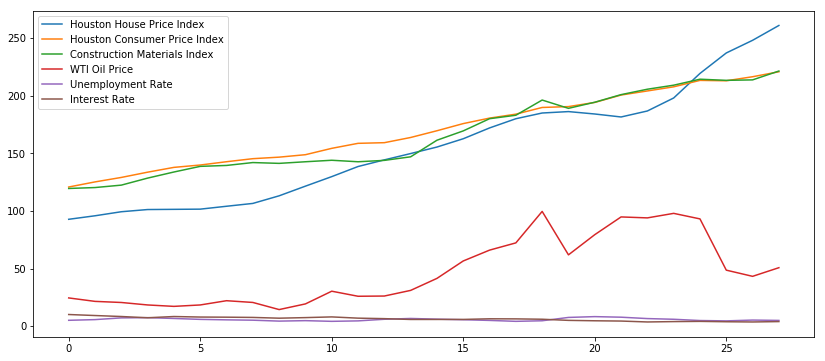

In [10]:
original_df.plot(figsize = (14,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d764a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115016b70>]], dtype=object)

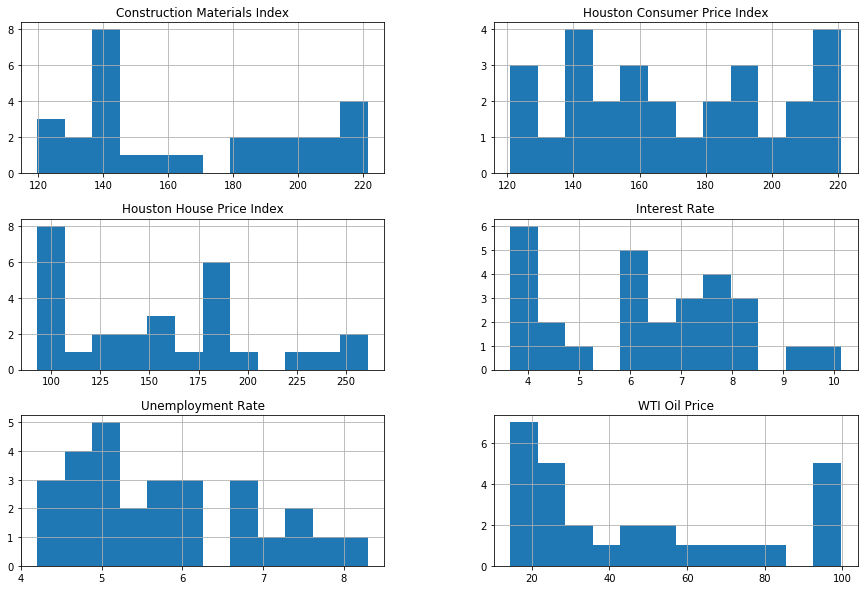

In [11]:
#Plot Histogram for all Variables 
original_df.hist(bins = 12 ,figsize =(15,10))

## Data Transfromation

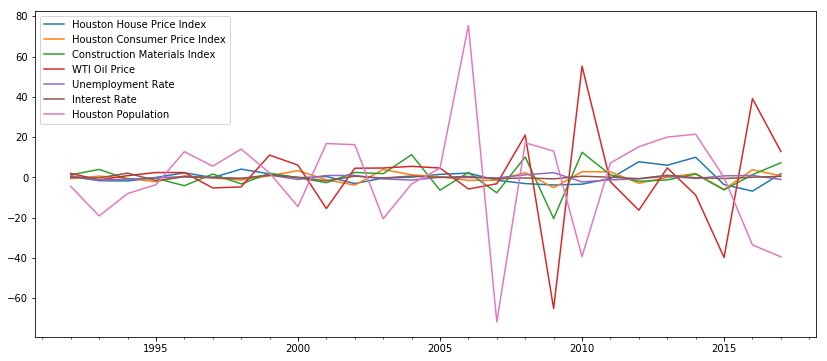

In [25]:
#Taking the first differences 
transformed_df = Houston_df.copy(deep=True)
transformed_df.index = years
transformed_df = transformed_df.diff()
transformed_df = transformed_df.diff()
transformed_df = transformed_df.dropna()
log_data.to_csv('../Data/Difference_Data.csv')
transformed_df.plot(figsize = (14,6))

## Transform Data: With Log and Difference

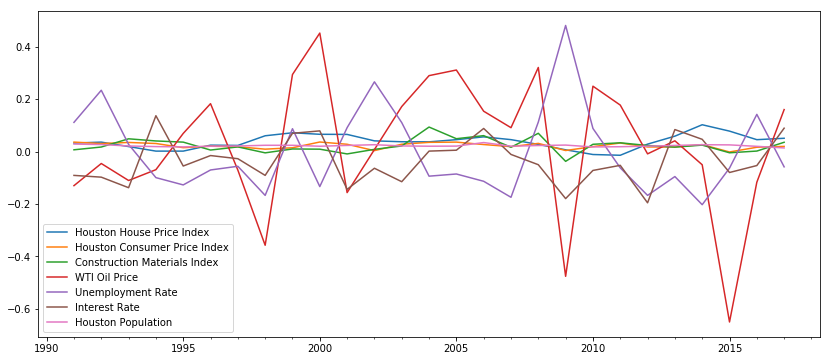

In [24]:
log_data = Houston_df.copy(deep=True)
log_data.index = years
log_data = log_data.apply(np.log)
log_data = log_data.diff()
log_data = log_data.dropna()
log_data.plot(figsize = (14,6))
log_data.to_csv('../Data/Transforme_Data.csv')
plt.savefig("../Output_Fig/Transformed_Data.png")
#log_data.describe()

In [22]:
log_data.columns.values

array(['Houston House Price Index', 'Houston Consumer Price Index',
       'Construction Materials Index', 'WTI Oil Price',
       'Unemployment Rate', 'Interest Rate', 'Houston Population'], dtype=object)

## Perform Regression

In [23]:
import statsmodels.formula.api as sm
reg_data = pd.DataFrame({
    "HPI": log_data['Houston House Price Index'],
    "HCPI": log_data['Houston Consumer Price Index'], 
    "Construction_Cost": log_data['Construction Materials Index'],
    "Oil_Price":log_data['WTI Oil Price'], 
    "Unemployment":log_data['Unemployment Rate'],
    "Interest":log_data['Interest Rate'],
    "Population":log_data['Houston Population']
})
reg_data = reg_data.reset_index(drop=True)

fit_result = sm.ols(formula="HPI ~ HCPI + Construction_Cost + Oil_Price + Unemployment + Interest + Population", 
                data=reg_data).fit()

print (fit_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     2.531
Date:                Sat, 19 Jan 2019   Prob (F-statistic):             0.0548
Time:                        11:03:14   Log-Likelihood:                 66.822
No. Observations:                  27   AIC:                            -119.6
Df Residuals:                      20   BIC:                            -110.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0213      0.02

In [16]:
fit_result2 = sm.ols(formula="HPI ~ Oil_Price", 
                data=reg_data).fit()

print (fit_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.3245
Date:                Sat, 19 Jan 2019   Prob (F-statistic):              0.574
Time:                        10:58:05   Log-Likelihood:                 59.371
No. Observations:                  27   AIC:                            -114.7
Df Residuals:                      25   BIC:                            -112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0386      0.005      7.157      0.0